In [1]:
# Lets import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\harip\OneDrive\Documents\Technocolab\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# checking null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.shape

(1470, 35)

In [7]:
# checking dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [10]:
# changing dtype into categorical
for cil in data.columns:
    if data[cil].dtype == "object":
        data[cil] = pd.Categorical(data[cil]).codes

In [11]:
data.dtypes

Age                         int64
Attrition                    int8
BusinessTravel               int8
DailyRate                   int64
Department                   int8
DistanceFromHome            int64
Education                   int64
EducationField               int8
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                       int8
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                      int8
JobSatisfaction             int64
MaritalStatus                int8
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                       int8
OverTime                     int8
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [12]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [13]:
# multivariant analysis
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

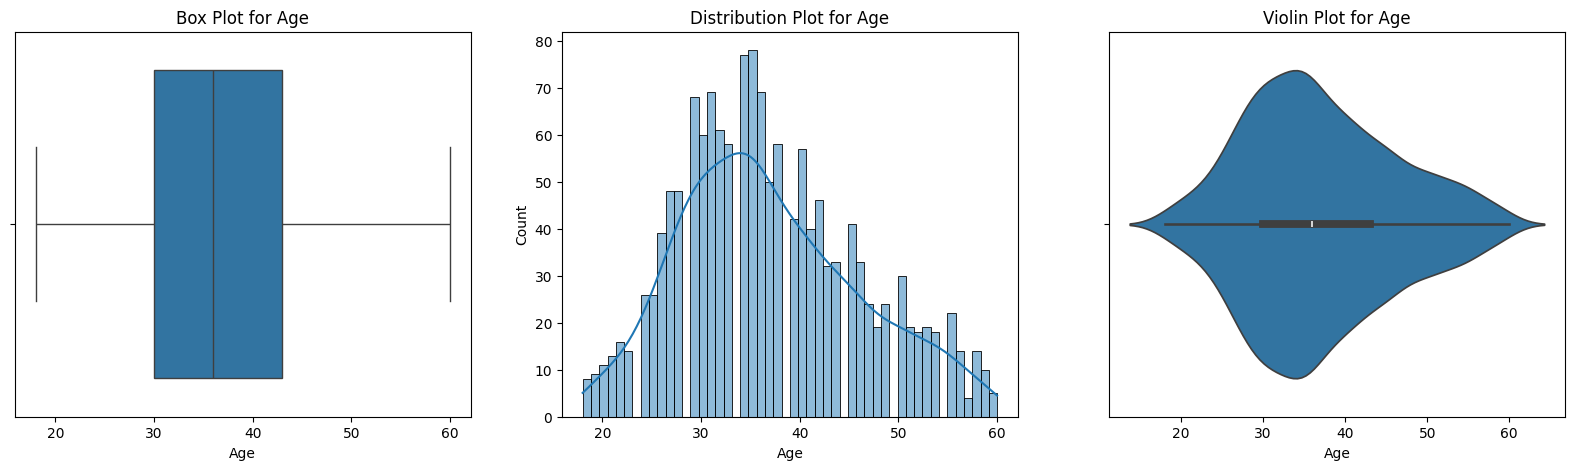

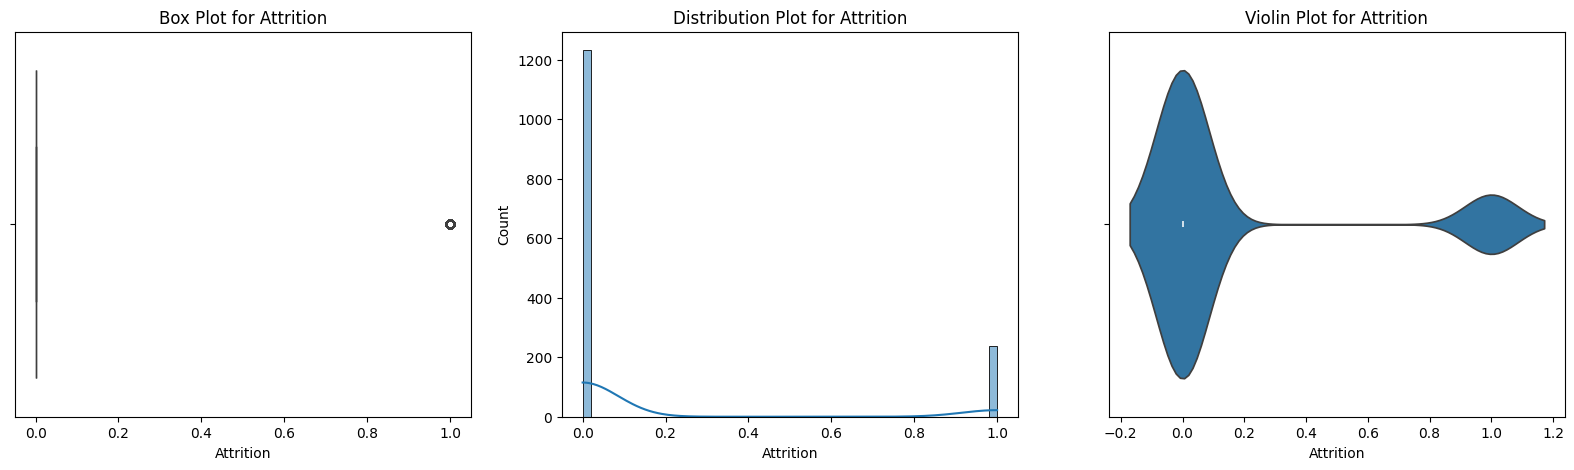

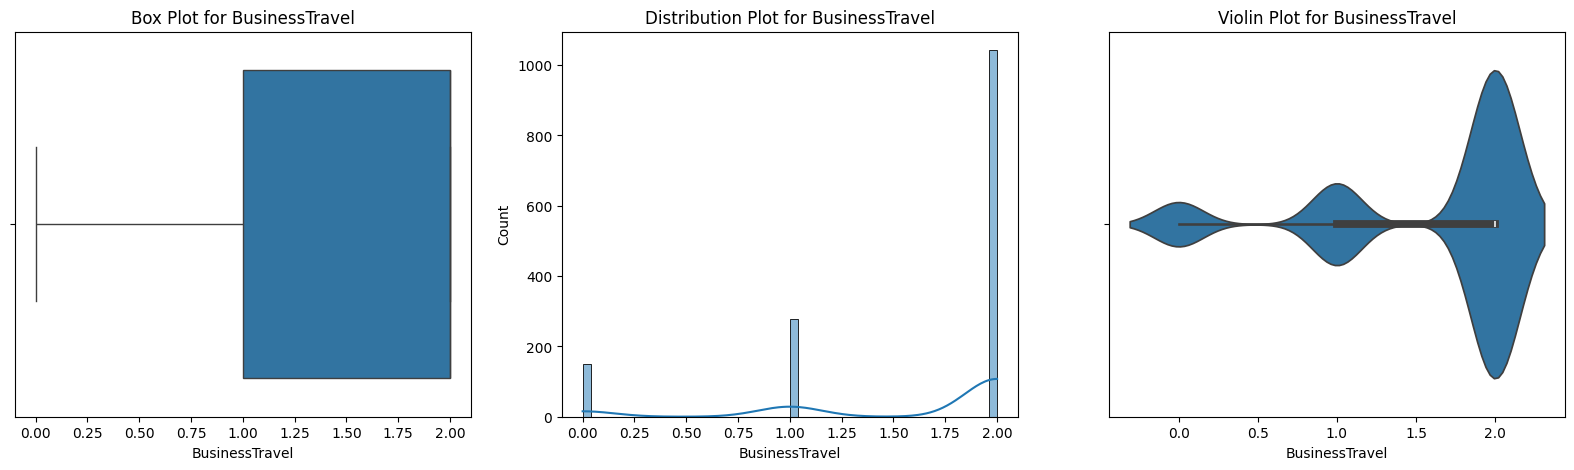

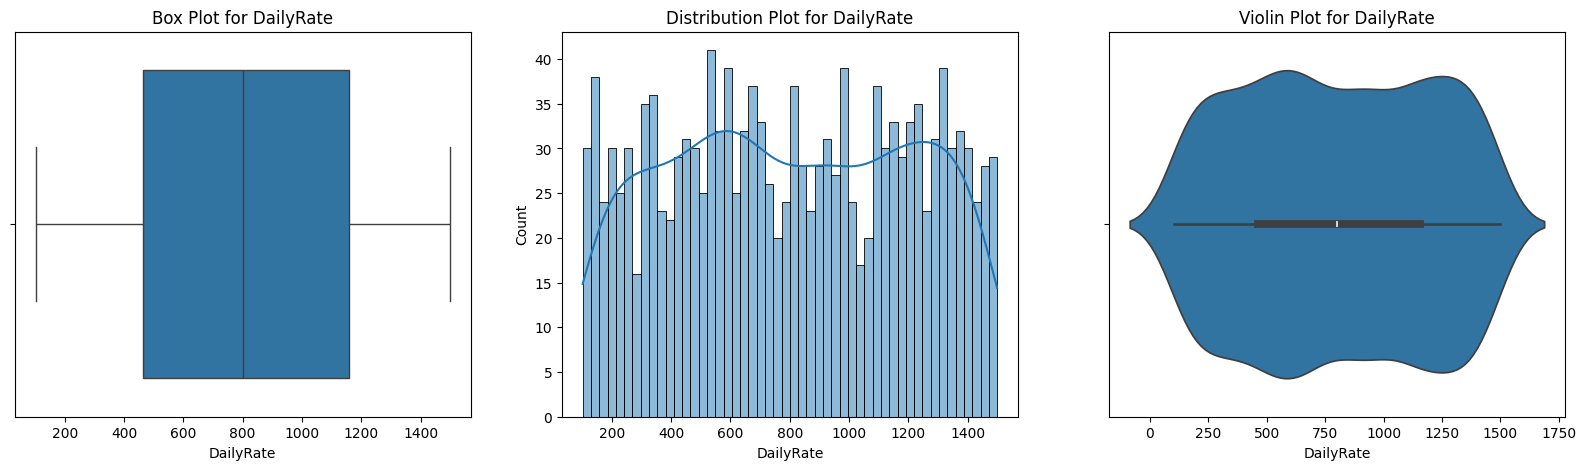

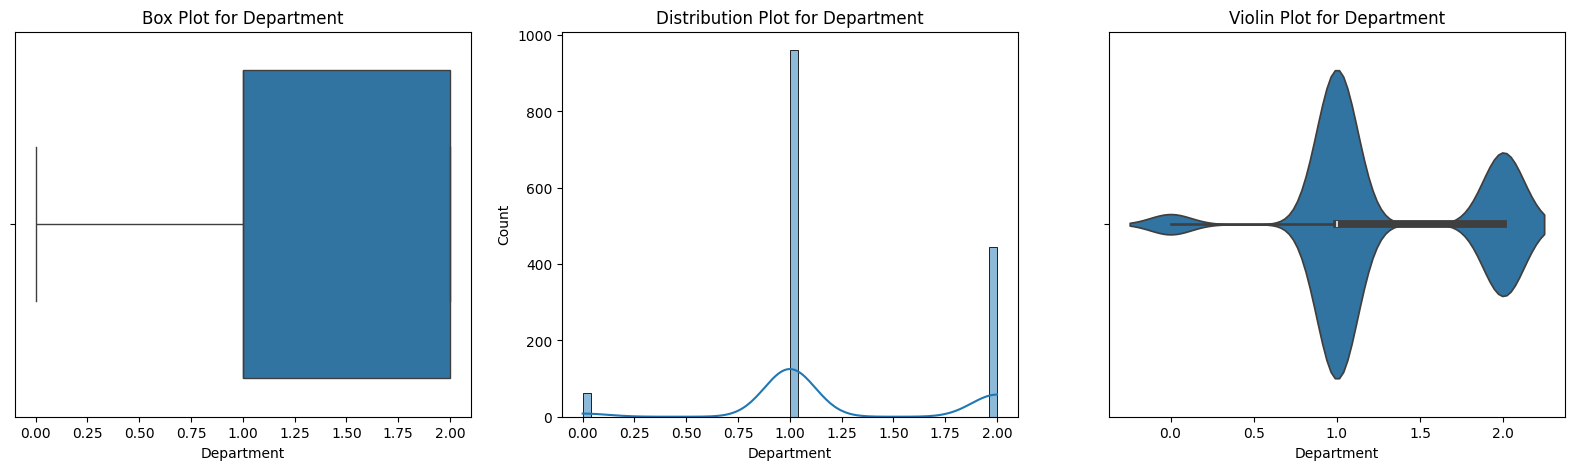

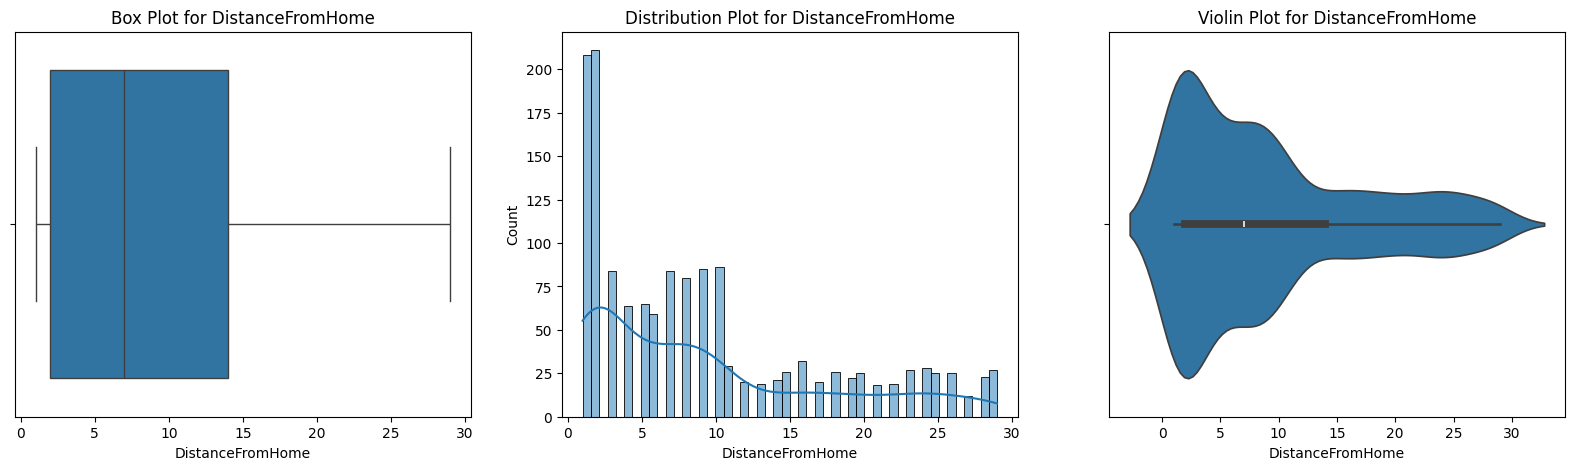

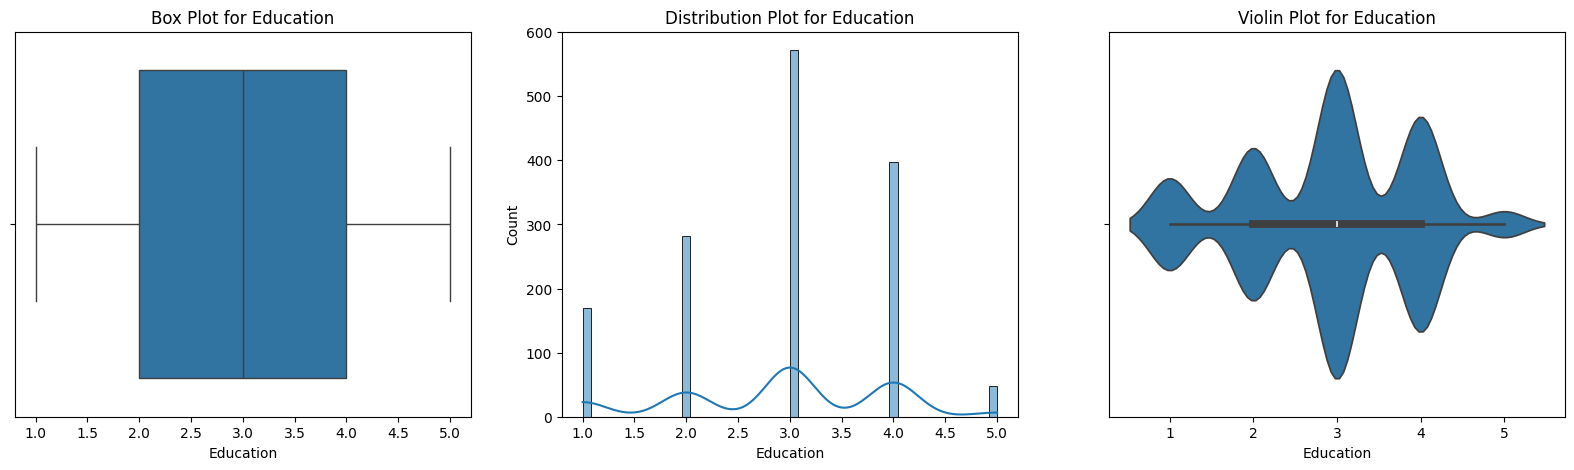

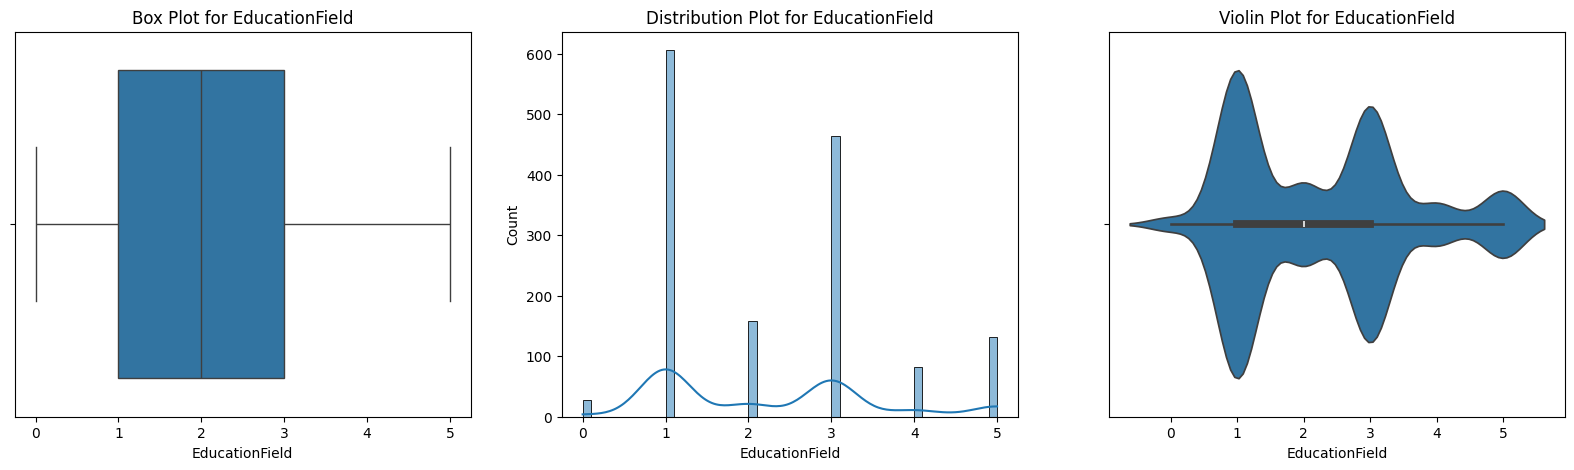

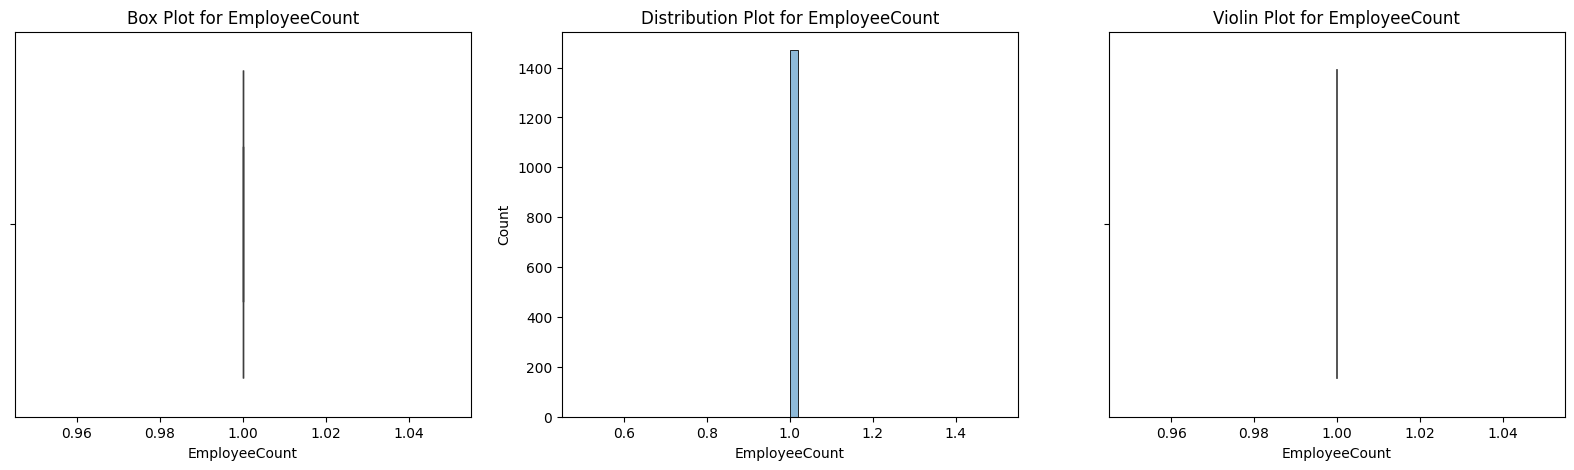

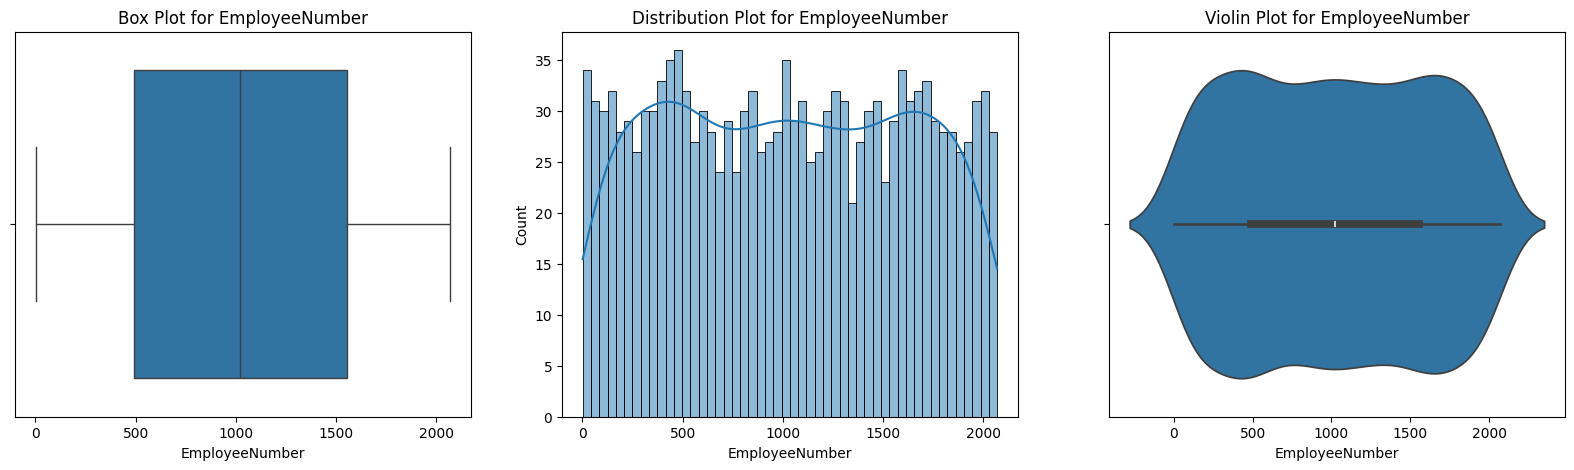

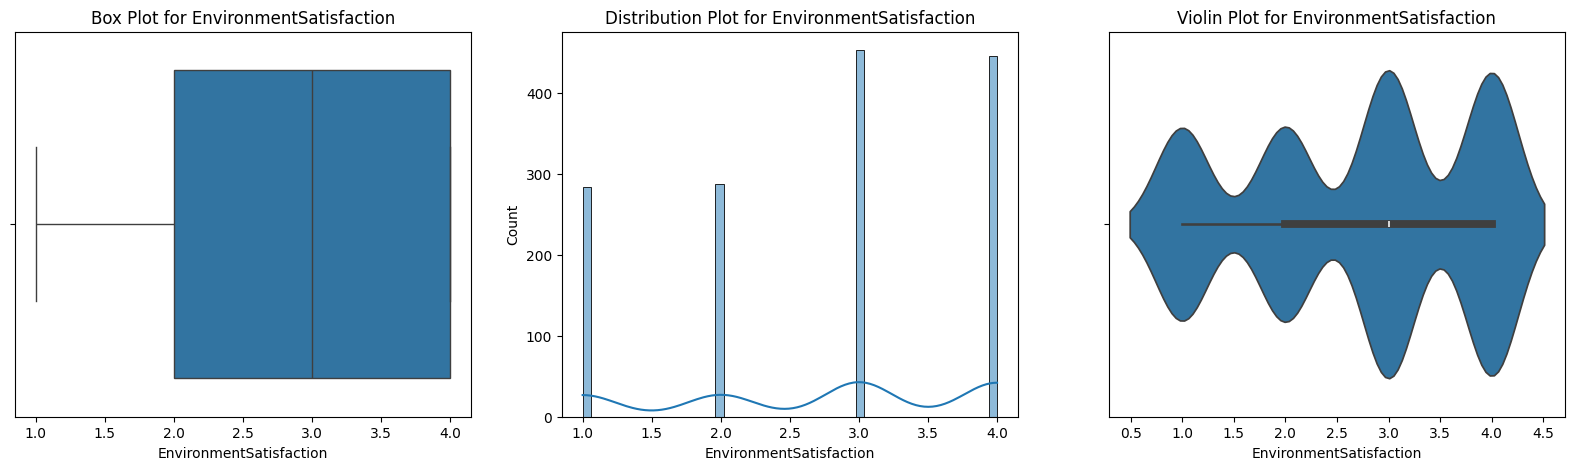

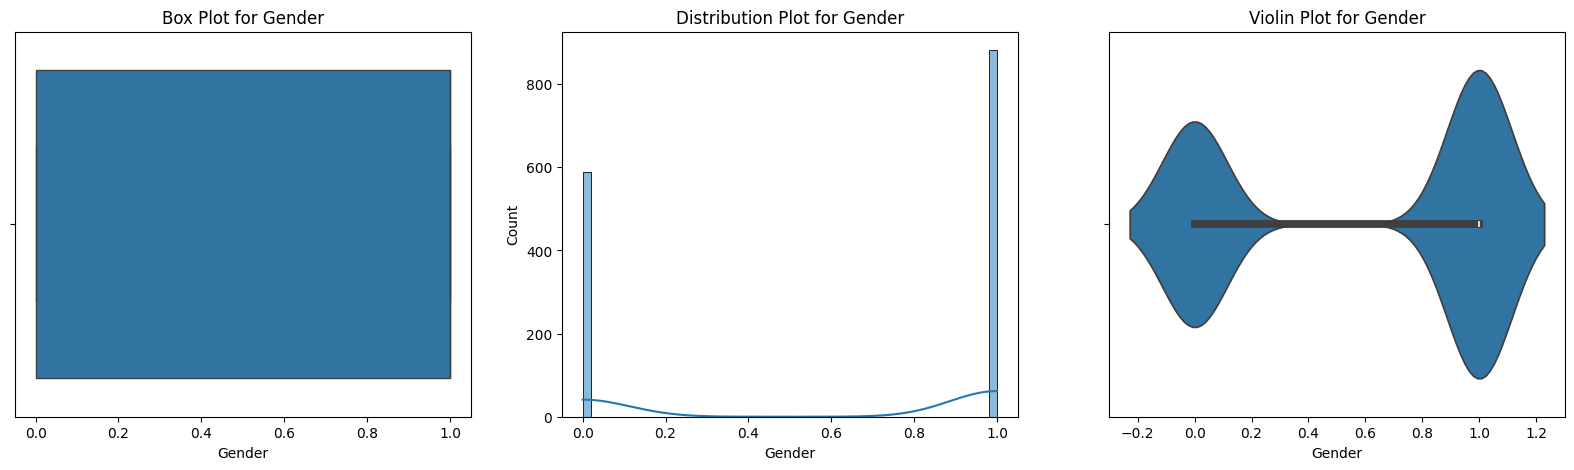

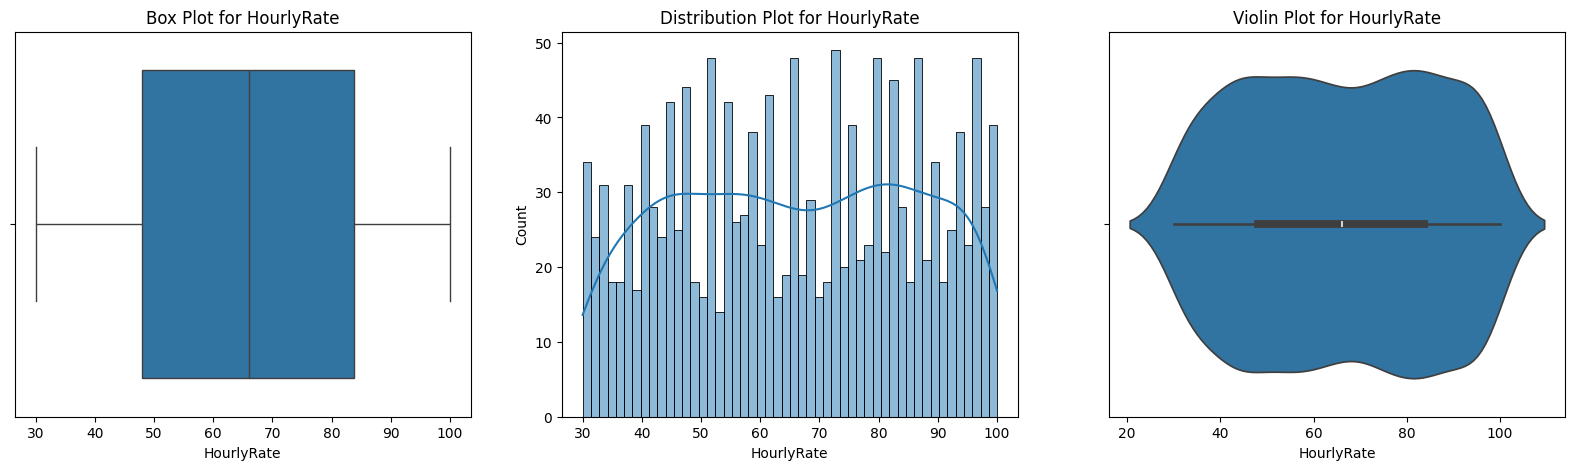

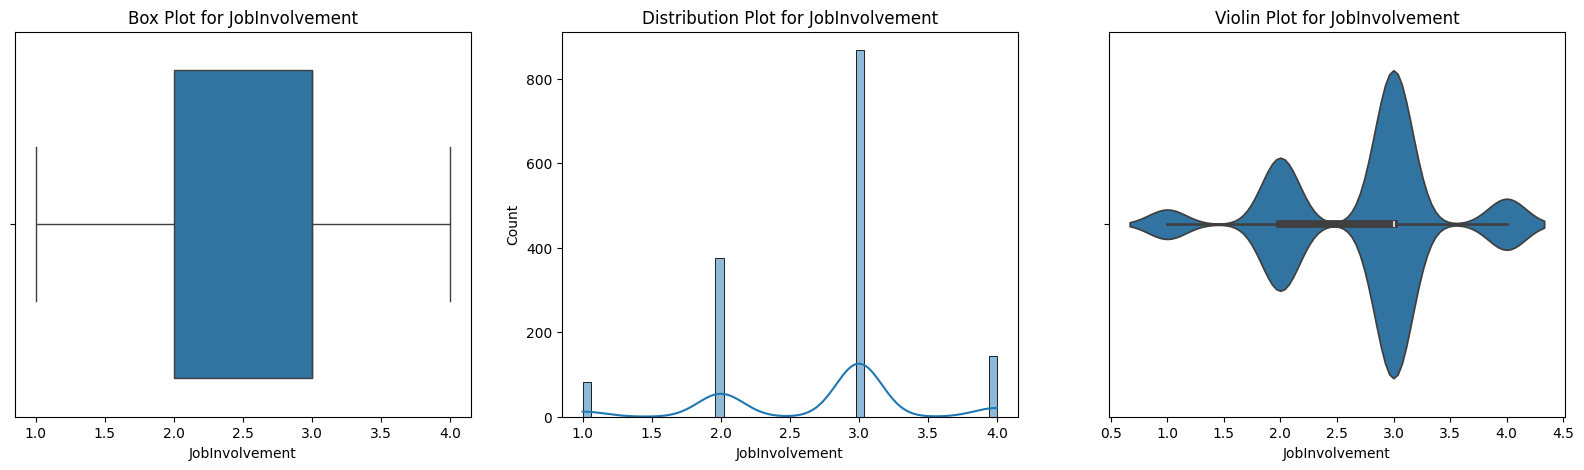

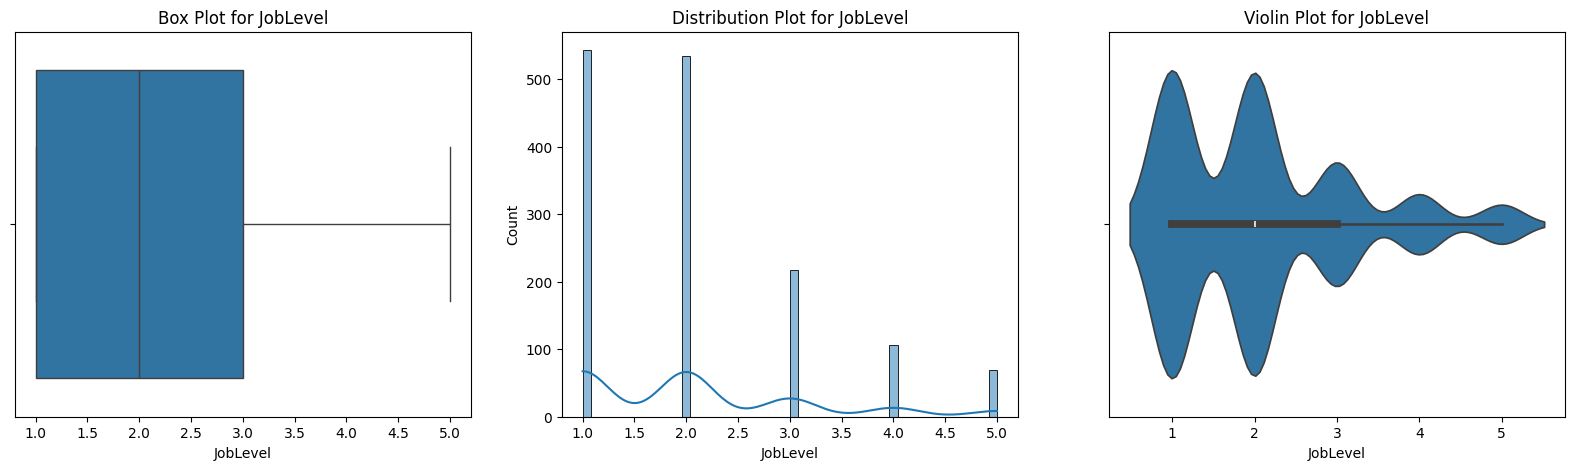

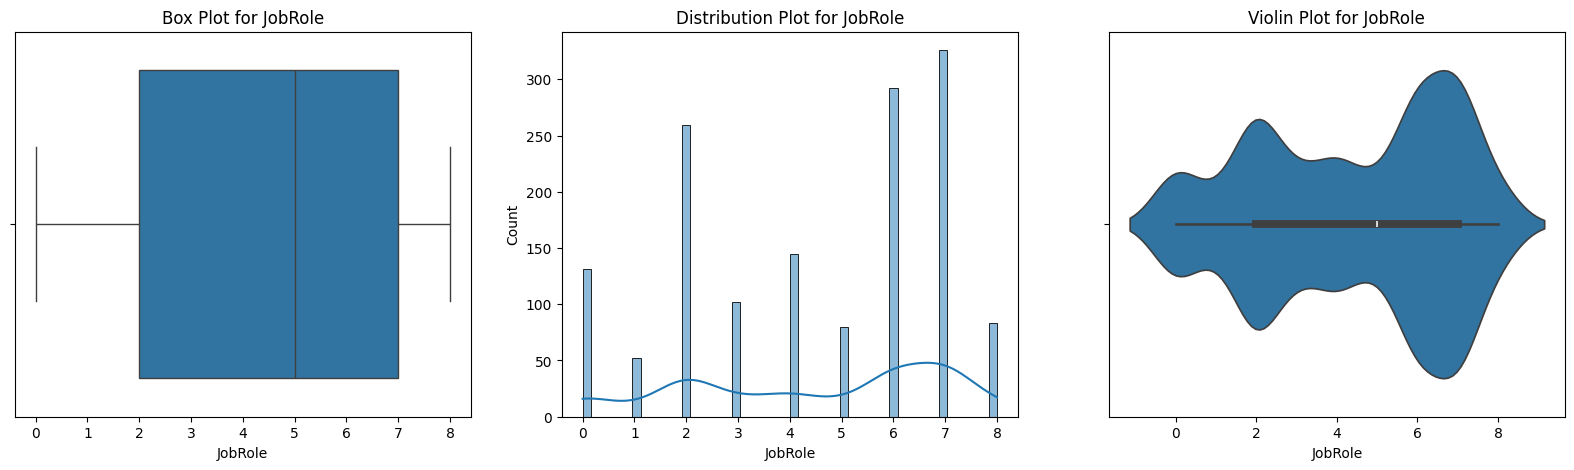

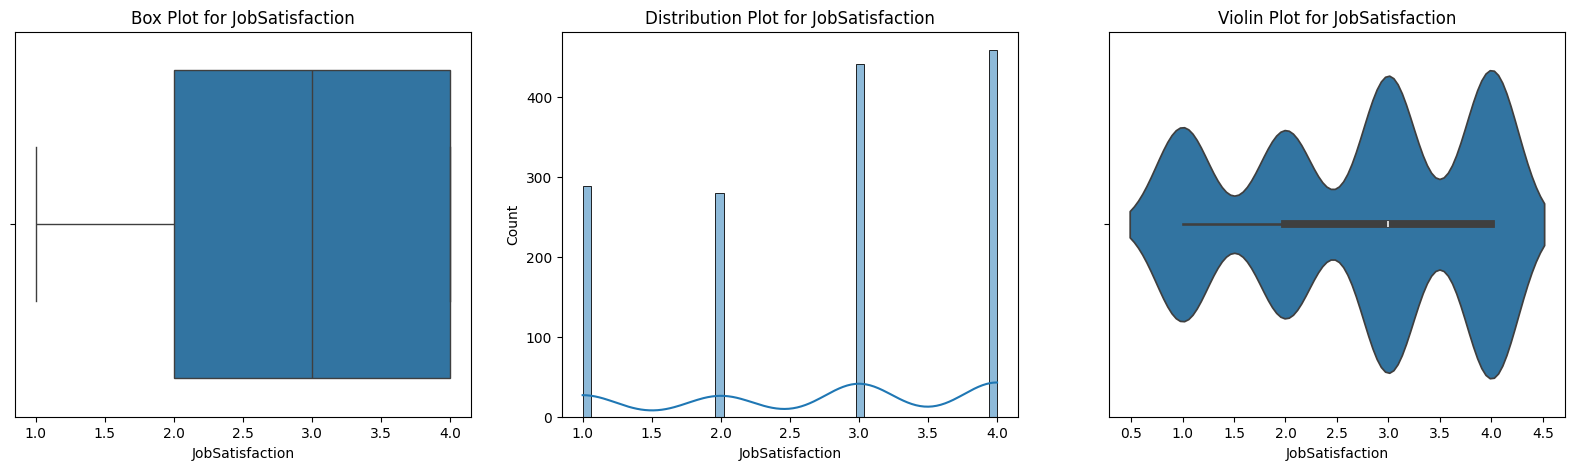

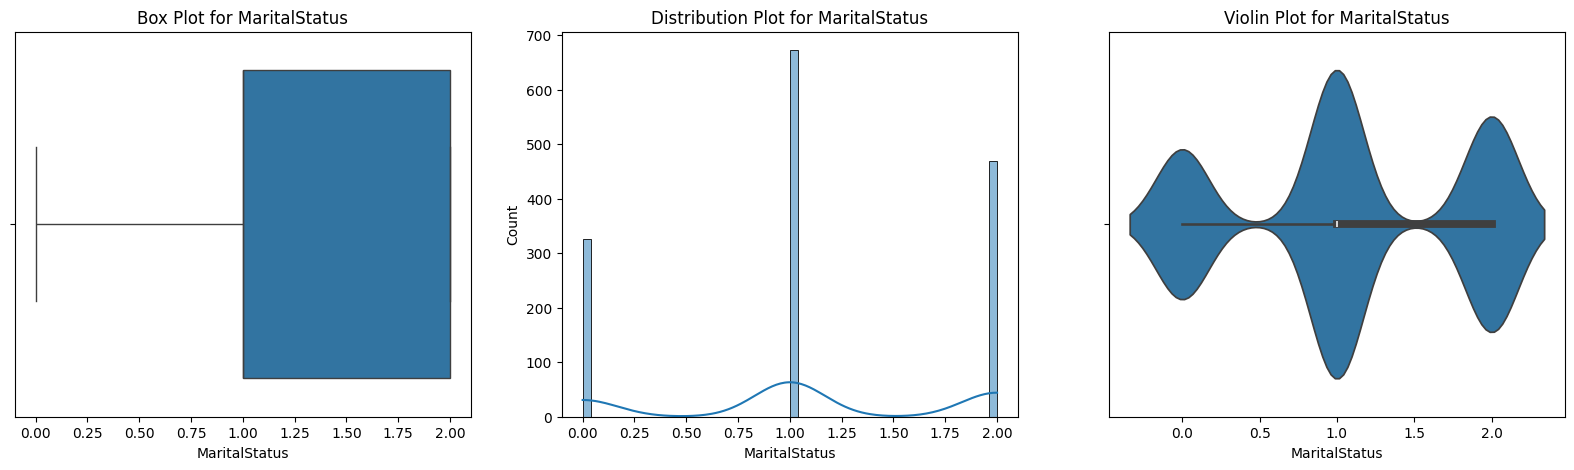

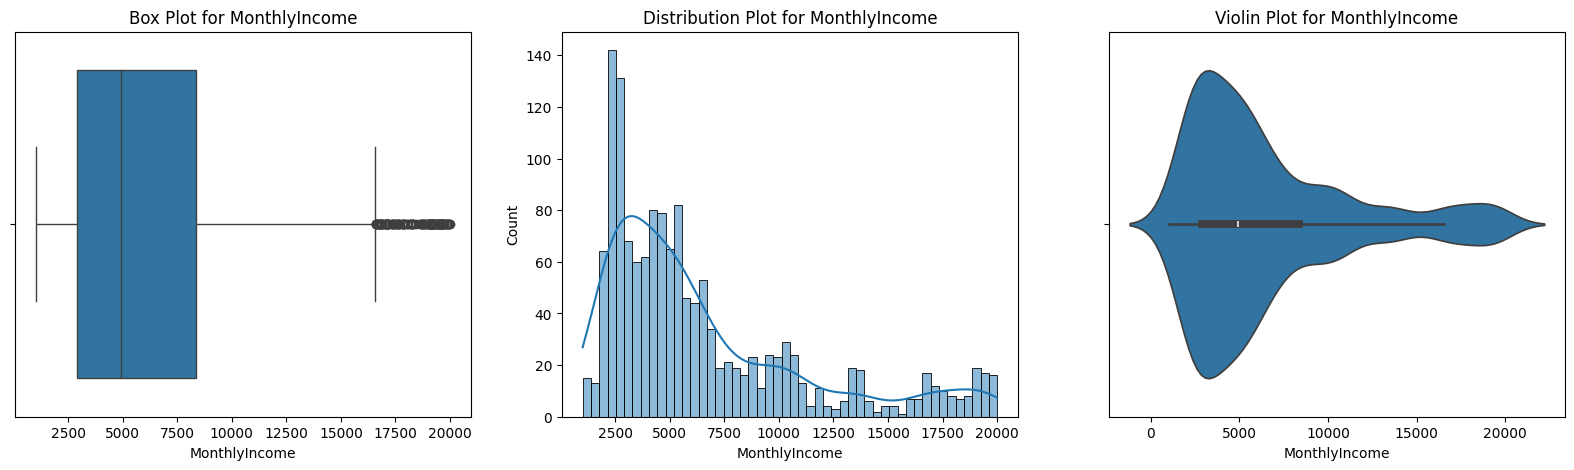

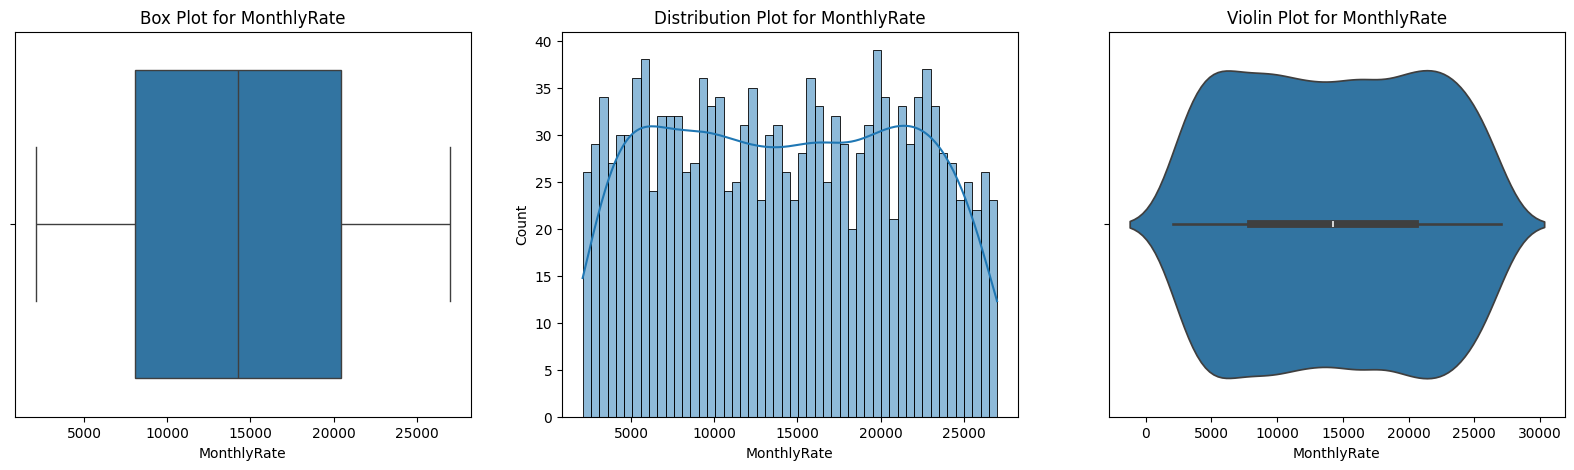

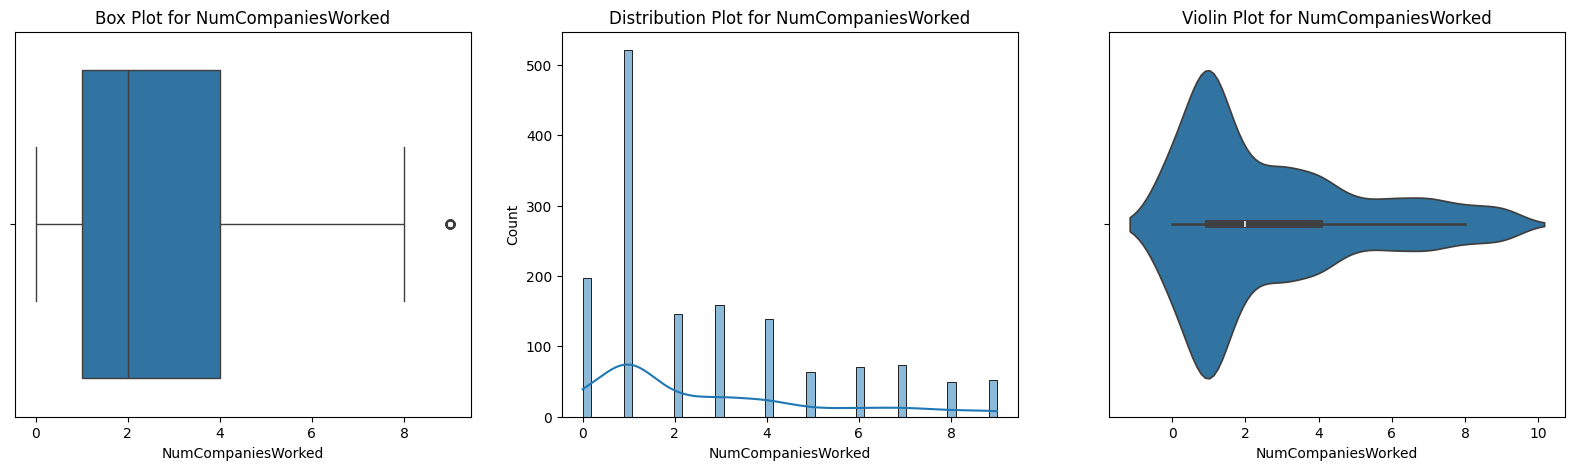

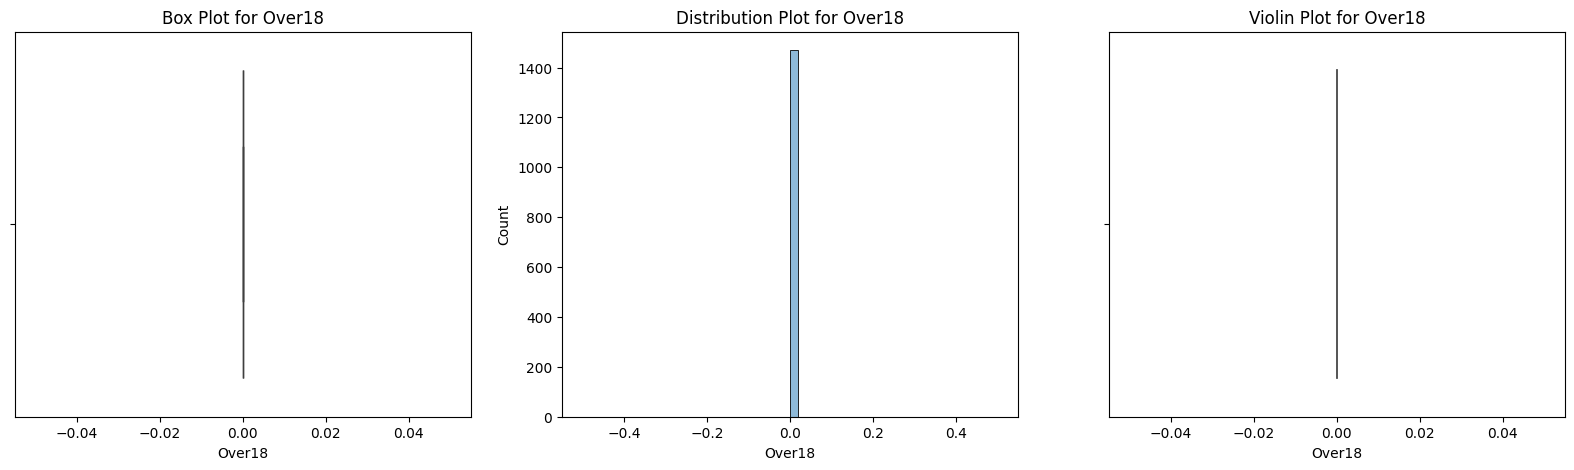

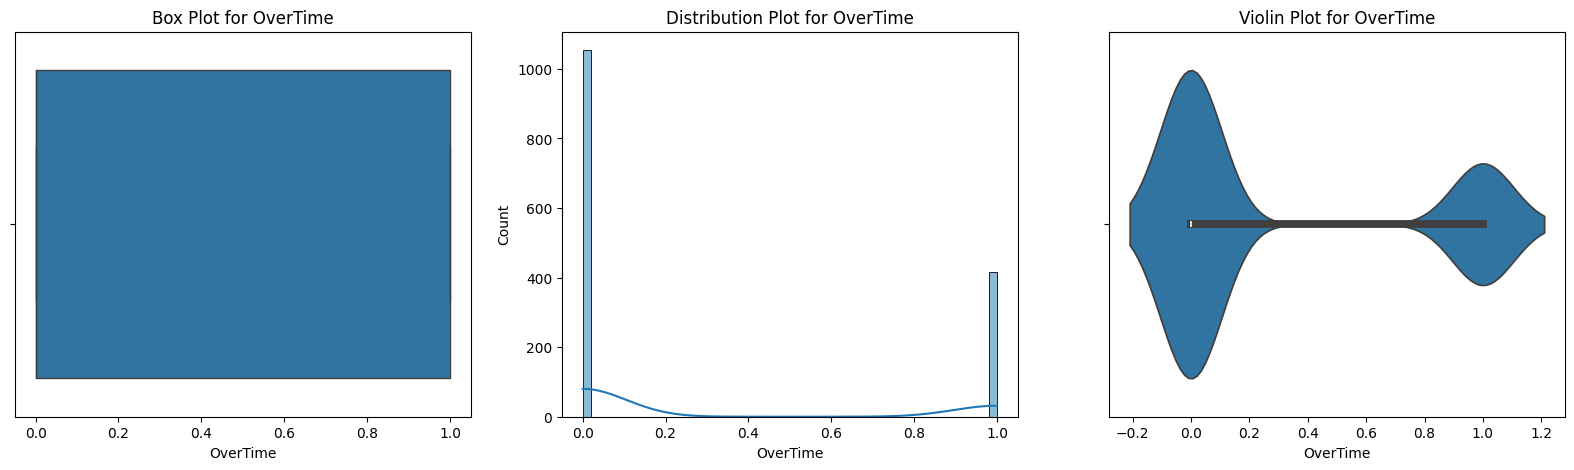

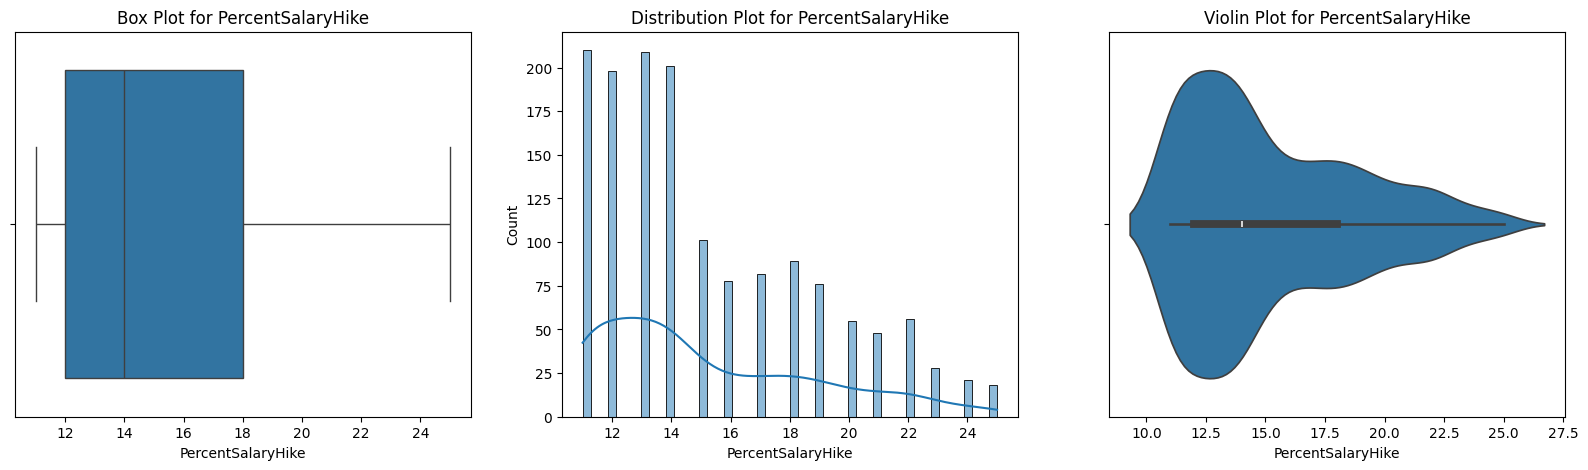

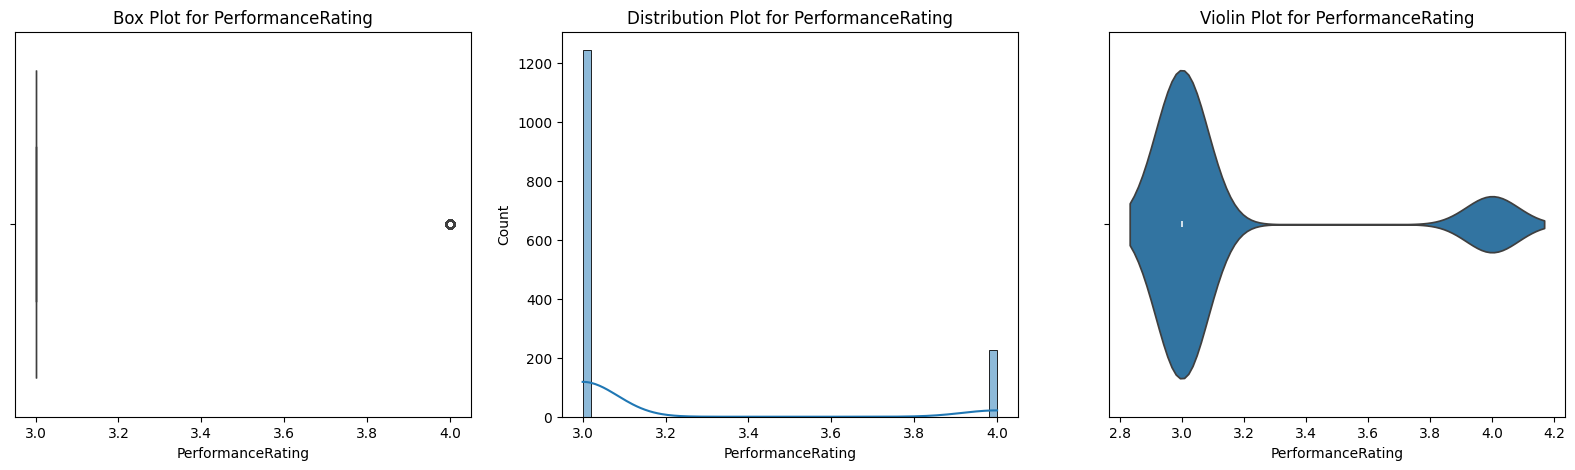

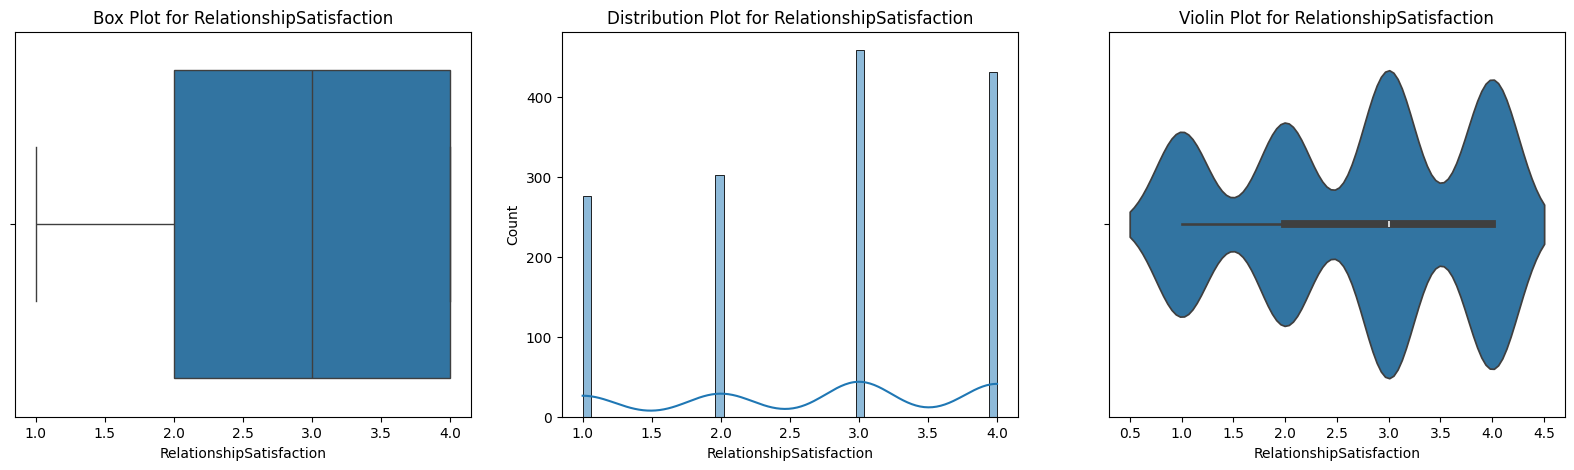

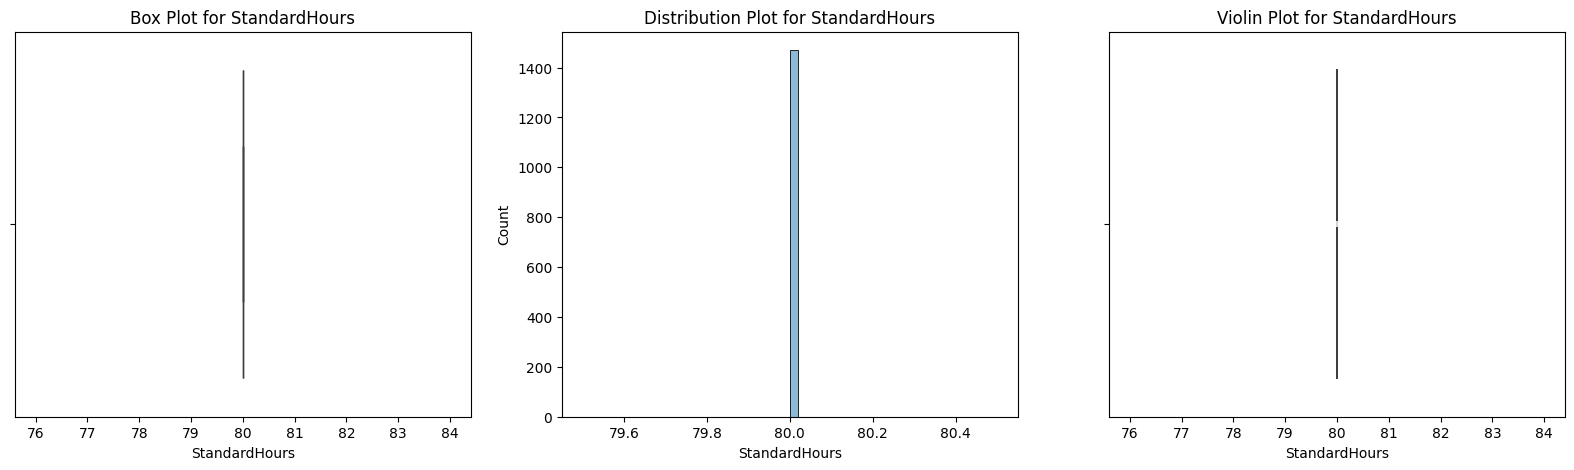

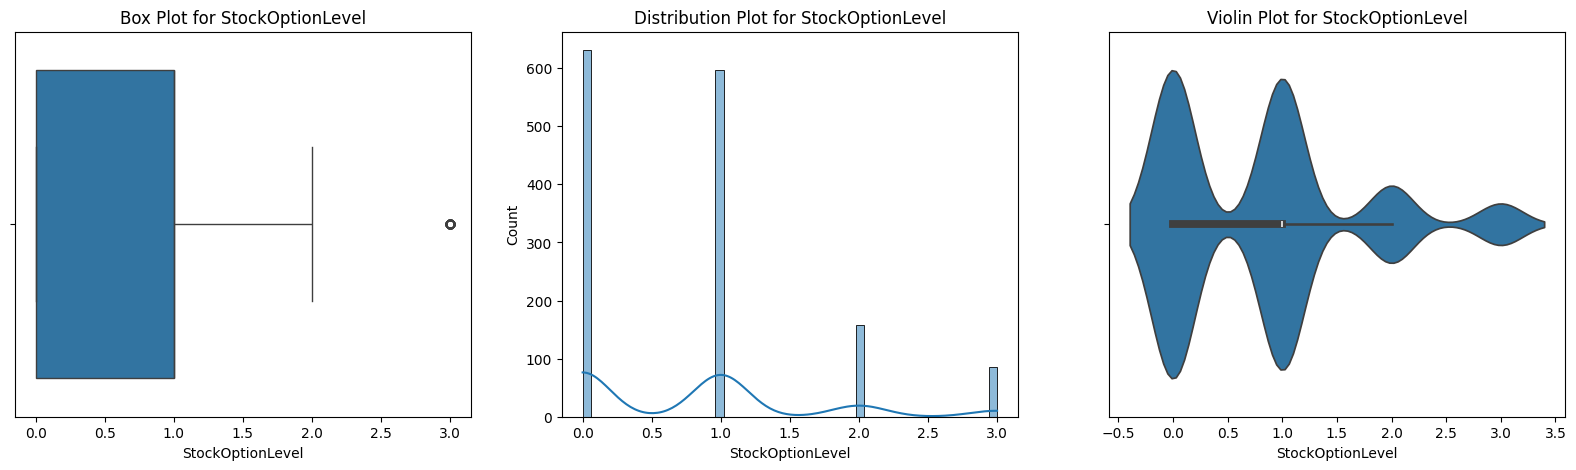

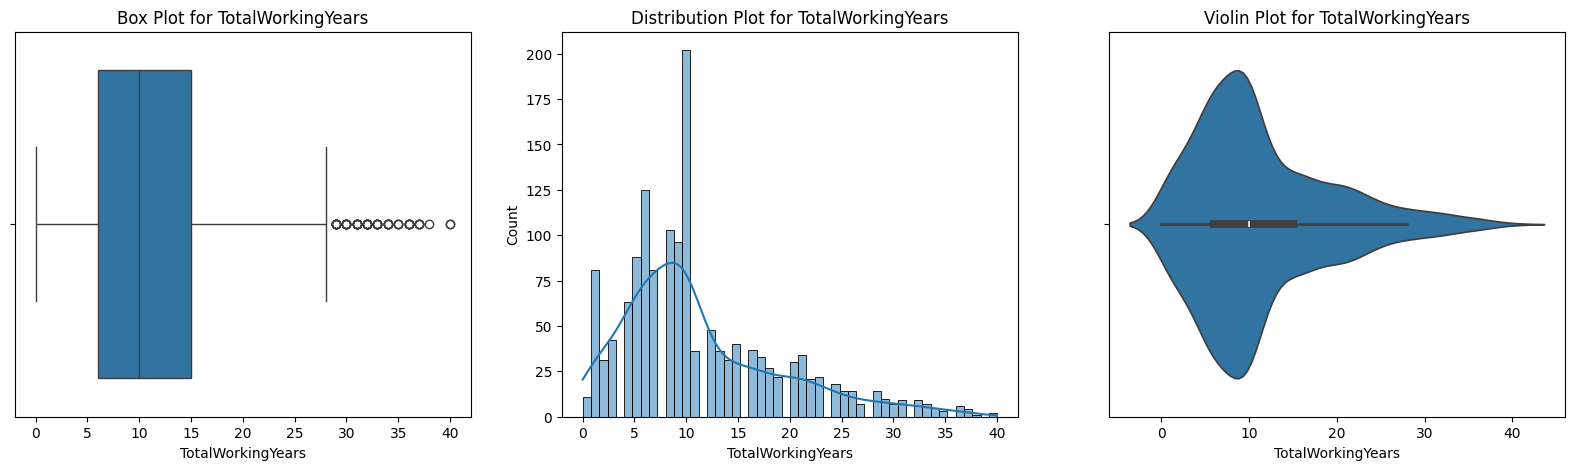

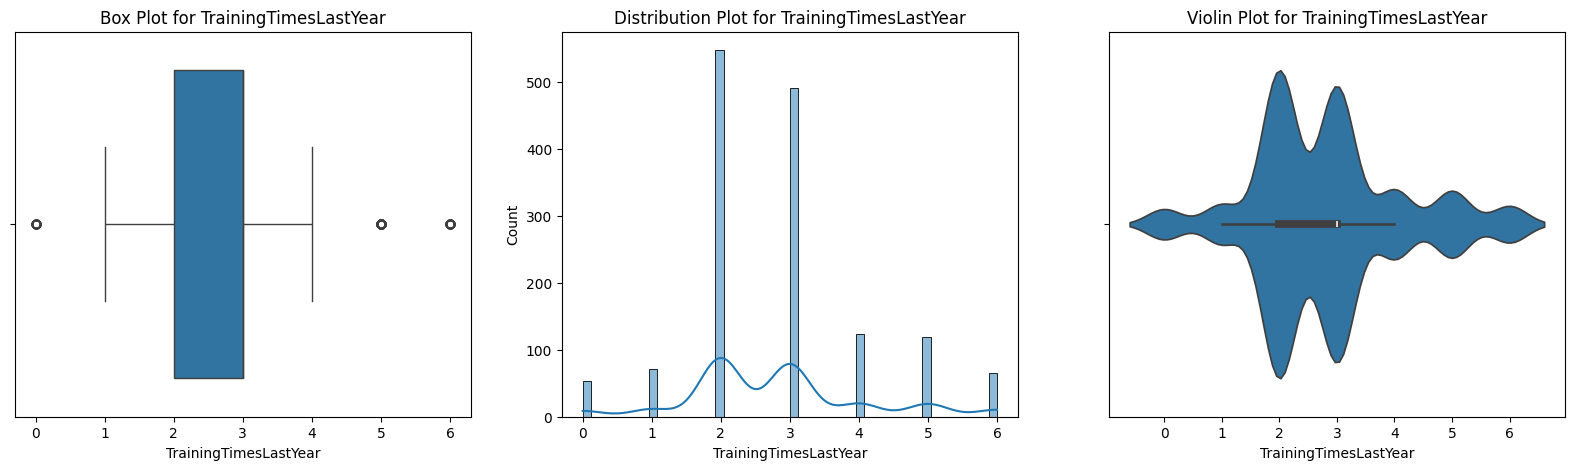

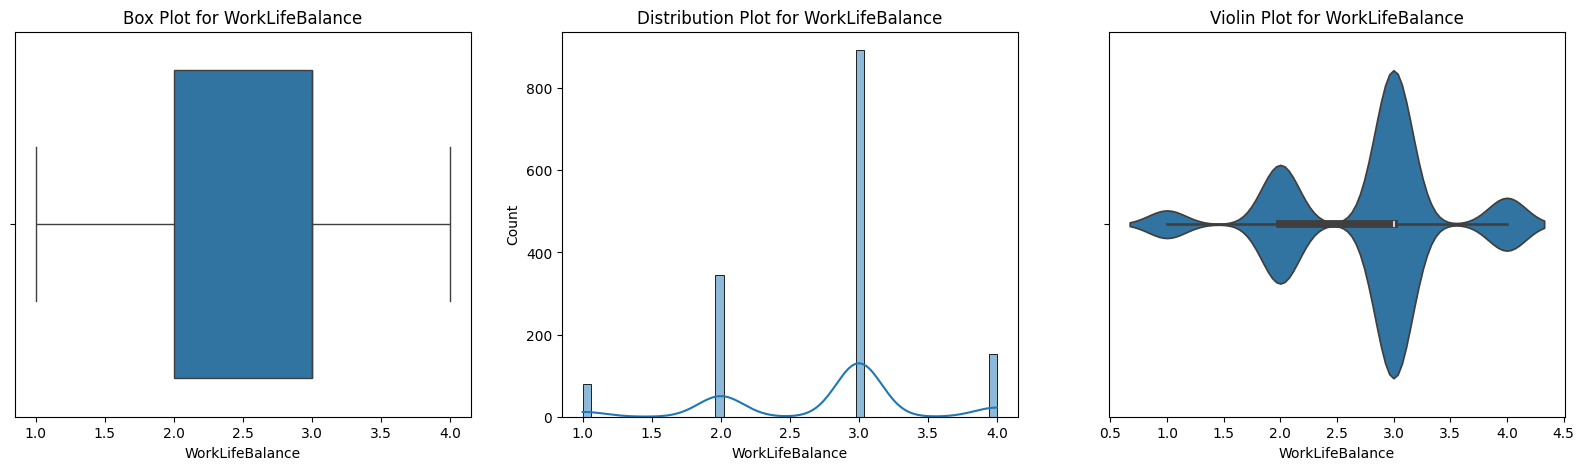

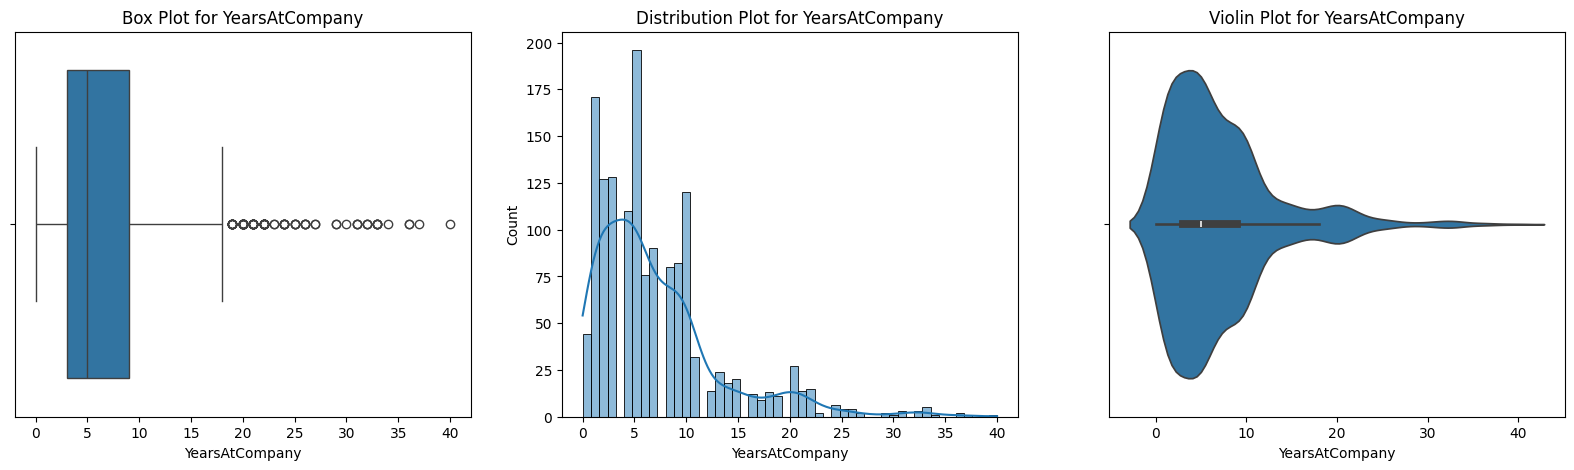

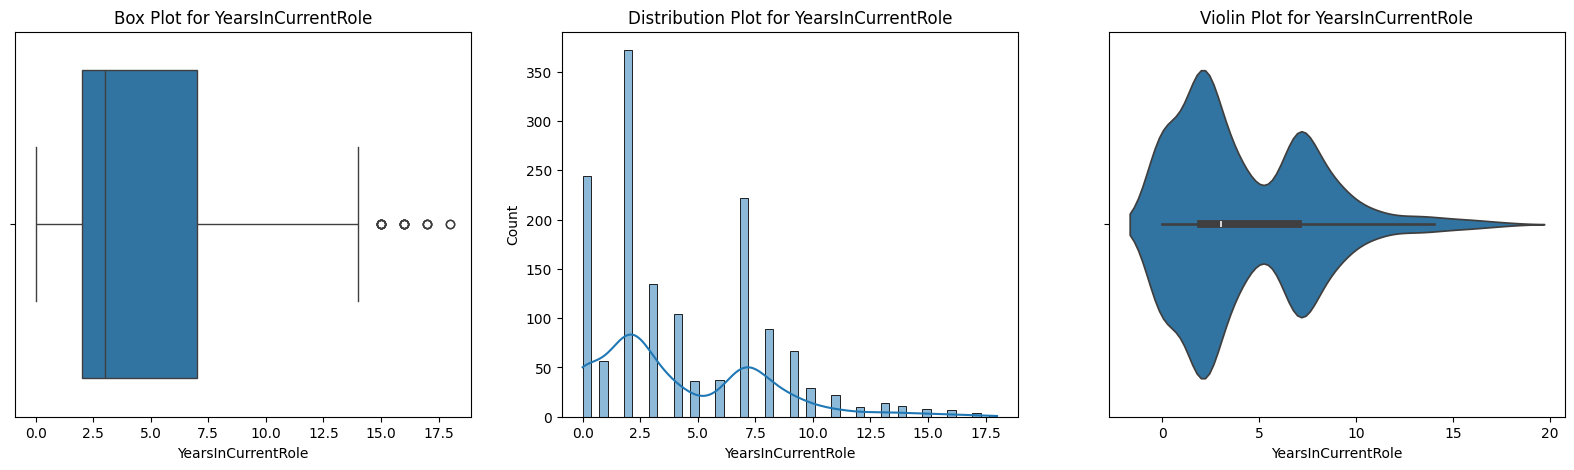

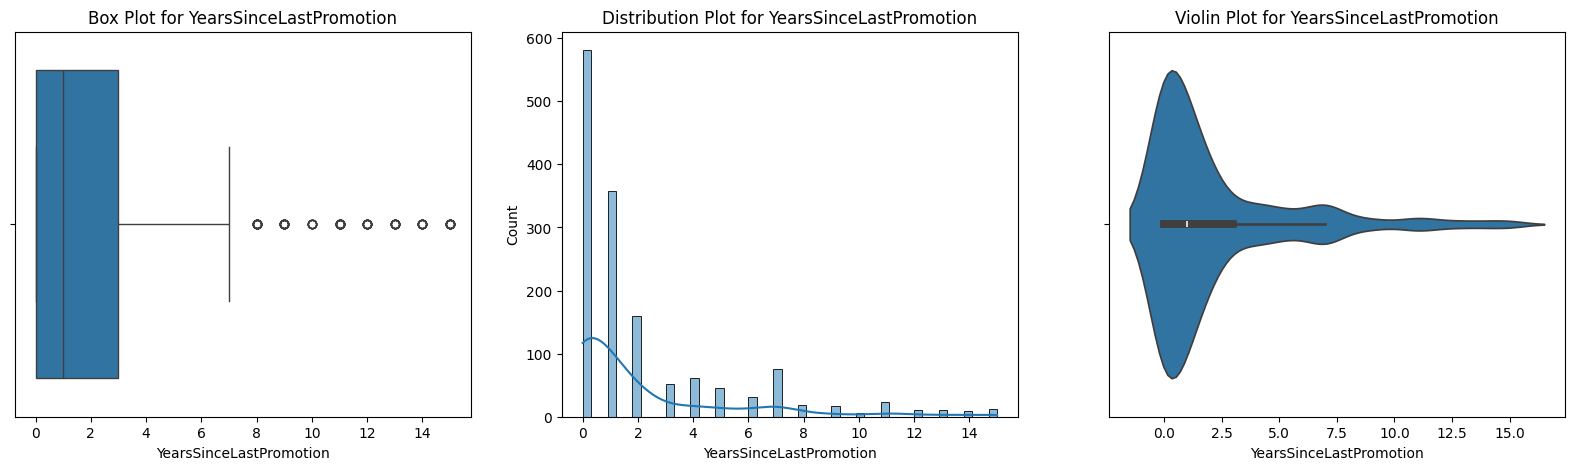

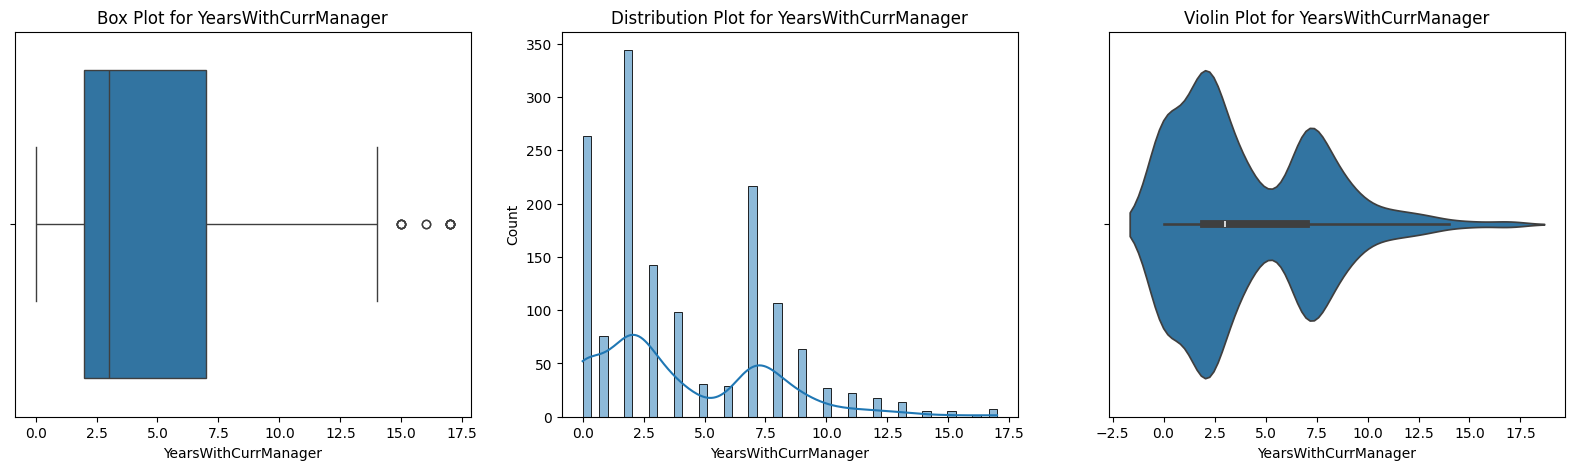

In [14]:
for i in ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']:
    plot(data, i)


In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
data.groupby(['Attrition','Department'])['EmployeeCount'].size().reset_index()

,Attrition,Department,EmployeeCount
0,0,0,51
1,0,1,828
2,0,2,354
3,1,0,12
4,1,1,133
5,1,2,92


<function matplotlib.pyplot.show(close=None, block=None)>

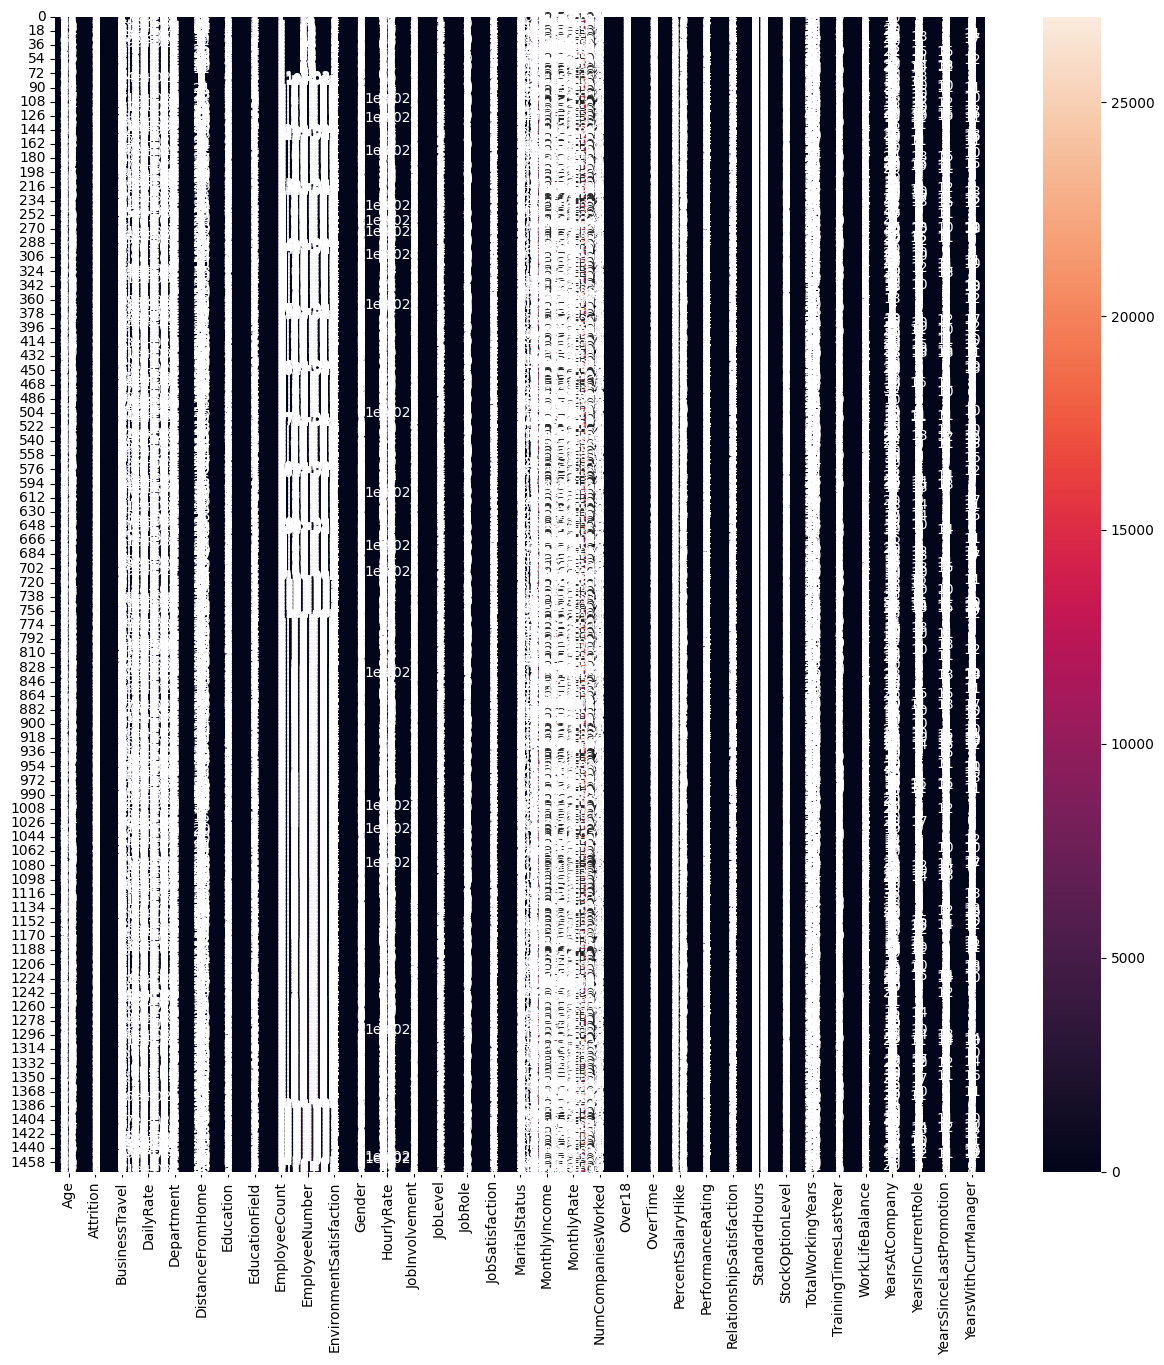

In [17]:
# Heat map visualization
plt.figure(figsize=(15,15))
sns.heatmap(data=data, annot= True)
plt.show

In [18]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
data.shape

(1470, 35)

In [20]:
data.groupby(['Department','Age'])['Attrition'].size().value_counts()

2     13
3     13
1     11
4      7
5      6
11     6
16     4
12     4
10     3
14     3
13     3
8      3
6      3
17     3
26     3
37     2
39     2
35     2
22     2
7      2
19     2
20     2
21     2
34     1
15     1
24     1
23     1
27     1
25     1
46     1
30     1
36     1
44     1
52     1
33     1
40     1
47     1
Name: Attrition, dtype: int64

In [21]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [24]:
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.77
Confusion Matrix:
[[218  37]
 [ 32   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



In [25]:
#Lets regularise decision tree
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth =5,min_samples_leaf=15,min_samples_split=45)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=45)

In [26]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Age                       0.000000
BusinessTravel            0.000000
DailyRate                 0.042664
Department                0.000000
DistanceFromHome          0.057931
Education                 0.000000
EducationField            0.000000
EmployeeCount             0.000000
EmployeeNumber            0.000000
EnvironmentSatisfaction   0.000000
Gender                    0.000000
HourlyRate                0.069800
JobInvolvement            0.000000
JobLevel                  0.030846
JobRole                   0.000000
JobSatisfaction           0.033323
MaritalStatus             0.086829
MonthlyIncome             0.239602
MonthlyRate               0.028645
NumCompaniesWorked        0.000000
Over18                    0.000000
OverTime                  0.235648
PercentSalaryHike         0.000000
PerformanceRating         0.000000
RelationshipSatisfaction  0.000000
StandardHours             0.000000
StockOptionLevel          0.026436
TotalWorkingYears   

In [27]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))


                               Imp
MonthlyIncome             0.239602
OverTime                  0.235648
TotalWorkingYears         0.087250
MaritalStatus             0.086829
HourlyRate                0.069800
DistanceFromHome          0.057931
YearsSinceLastPromotion   0.054541
DailyRate                 0.042664
JobSatisfaction           0.033323
JobLevel                  0.030846
MonthlyRate               0.028645
StockOptionLevel          0.026436
YearsAtCompany            0.006487
StandardHours             0.000000
TrainingTimesLastYear     0.000000
RelationshipSatisfaction  0.000000
WorkLifeBalance           0.000000
PerformanceRating         0.000000
YearsInCurrentRole        0.000000
PercentSalaryHike         0.000000
Age                       0.000000
Over18                    0.000000
NumCompaniesWorked        0.000000
BusinessTravel            0.000000
JobRole                   0.000000
JobInvolvement            0.000000
Gender                    0.000000
EnvironmentSatisfact


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       255
           1       0.24      0.18      0.21        39

    accuracy                           0.82       294
   macro avg       0.56      0.55      0.55       294
weighted avg       0.79      0.82      0.80       294



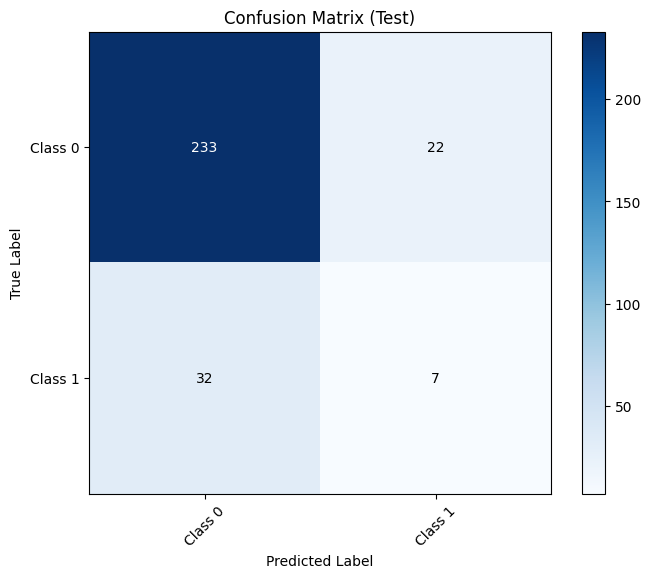

AUC (Test): 0.579


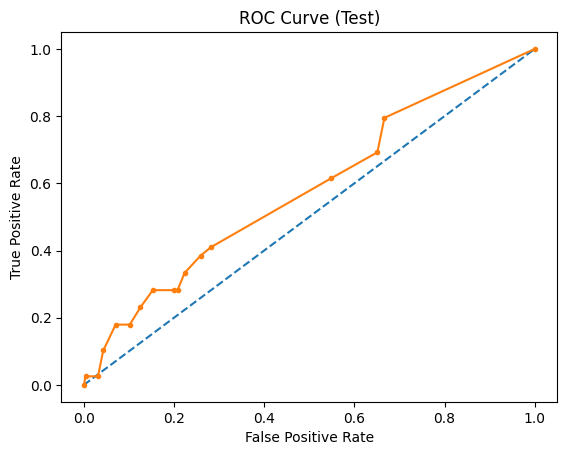

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have a Decision Tree model named reg_dt_model
# Replace X_test and y_test with your actual test set
# Note: In this example, I'm using a DecisionTreeClassifier; replace it with your regression decision tree model.

# Make predictions on the test set
y_pred_test = reg_dt_model.predict(X_test)

# Print Classification Report for the test set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Plot the Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Test)')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix_test[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix_test[i, j] > conf_matrix_test.max() / 2.0 else "black")

plt.show()

# Calculate AUC-ROC score for the test set
probs_test = reg_dt_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, probs_test)
print('AUC (Test): %.3f' % auc_test)

# Plot ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test, tpr_test, marker='.')
plt.title('ROC Curve (Test)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

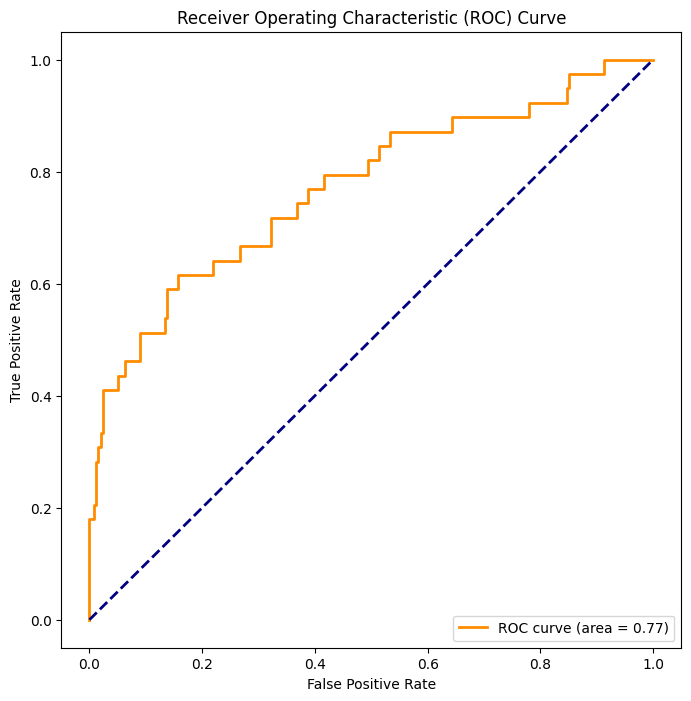

Accuracy: 0.891156462585034
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix:
 [[249   6]
 [ 26  13]]
AUC-ROC: 0.7721468074409251


In [29]:
# Logistic regression for testing data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")

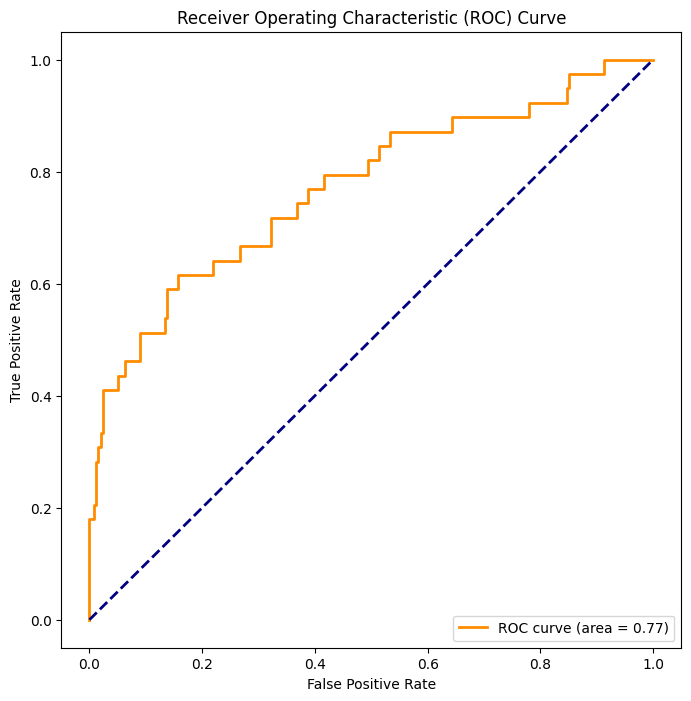

Accuracy: 0.891156462585034
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix:
 [[249   6]
 [ 26  13]]
AUC-ROC: 0.7721468074409251


In [30]:
# Logestic regression for training data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler for both training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Train the model on the scaled training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)
print(f"AUC-ROC: {roc_auc}")

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Assuming your dataset is stored in a variable called 'data'
# data = pd.read_csv("your_dataset.csv")

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['Over18'] = label_encoder.fit_transform(data['Over18'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

# Define X and Y
X = data.drop('Attrition', axis=1)
Y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8333333333333334
Confusion Matrix:
 [[224  31]
 [ 18  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       255
           1       0.40      0.54      0.46        39

    accuracy                           0.83       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.86      0.83      0.84       294

